### Employe Salary Prediction :  An ML-Powered Employee Income Predictor

### Structure Of Machine Learning:

In [64]:
### 🔷 1. Problem Definition
### 🔷 2. Data Collection
### 🔷 3. Data Preprocessing-:
 ###           Cleaning
 ###           Feature selection/extraction
 ###           Normalization
### 🔷 4. Encoding
### 🔷 5. Splitting the Dataset
### 🔷 6. Choosing a Model
### 🔷 7. Training and Testing the Model
### 🔷 8. Model Evaluation and  Optimization
### 🔷 9. Deployment
### 🔷 10. Monitoring & Maintenance

### 1.Understand the goal
### 2.CSV file

In [65]:
import pandas as pd

In [66]:
data=pd.read_csv("/content/data.csv")

In [67]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [68]:
data.shape

(48842, 15)

### 3. Data Preprocessing

In [69]:
data.isnull()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [70]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [71]:
data.age.value_counts()

,count
age,
36,1348
35,1337
33,1335
23,1329
31,1325
...,...
88,6
85,5
87,3


In [72]:
data.gender.value_counts()

,count
gender,
Male,32650
Female,16192


In [73]:
data.occupation.value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
?,2809
Transport-moving,2355


In [74]:
data.education.value_counts()

,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


In [75]:
data.fnlwgt.value_counts()

,count
fnlwgt,
203488,21
190290,19
120277,19
125892,18
126569,18
...,...
436163,1
320084,1
125976,1


In [76]:
data['hours-per-week'].value_counts()

,count
hours-per-week,
40,22803
50,4246
45,2717
60,2177
35,1937
...,...
79,1
94,1
87,1


In [77]:
data['relationship'].value_counts()

,count
relationship,
Husband,19716
Not-in-family,12583
Own-child,7581
Unmarried,5125
Wife,2331
Other-relative,1506


In [78]:
data['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


In [79]:
print(data.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [80]:
data['native-country'].value_counts()

,count
native-country,
United-States,43832
Mexico,951
?,857
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


In [81]:
data.occupation.replace({"?":"others"},inplace=True)
data['native-country'].replace({'?':'others'},inplace=True)
data['workclass'].replace({'?':'others'},inplace=True)

/tmp/ipython-input-70809215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({"?":"others"},inplace=True)
/tmp/ipython-input-70809215.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [82]:
data.occupation.value_counts()


,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
others,2809
Transport-moving,2355


In [83]:
data['native-country'].value_counts()

,count
native-country,
United-States,43832
Mexico,951
others,857
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


In [84]:
data=data[data['workclass']!='Without-pay']

In [85]:
data=data[data['workclass']!='Never-worked']

In [86]:
data['workclass'].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
others,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432


In [87]:
data.shape

(48811, 15)

In [88]:
data=data[data['education']!='Preschool']

In [89]:
data.shape

(48728, 15)

In [90]:
data=data[data['education']!='5th-6th']
data=data[data['education']!='1st-4th']


In [91]:
data.shape


(47972, 15)

In [92]:
data.drop(columns=['education'],inplace=True)

In [93]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,others,103497,10,Never-married,others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


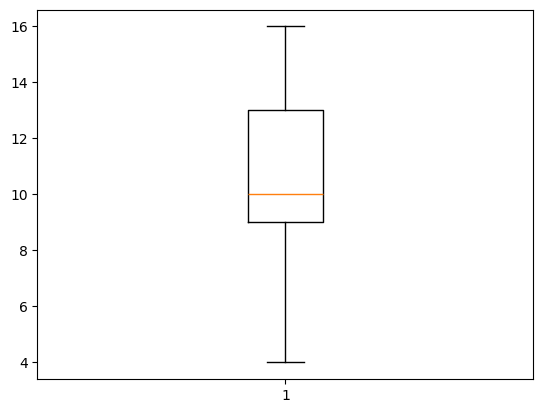

In [94]:
import matplotlib.pyplot as plt
plt.boxplot(data['educational-num'])
plt.show()

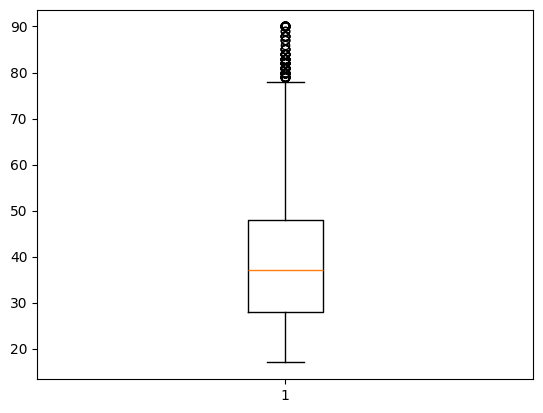

In [95]:

import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

In [96]:
data=data[(data['age']<=75) & (data['age']>=17)]

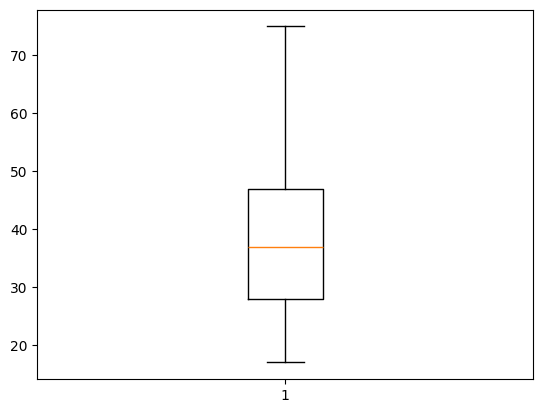

In [97]:
plt.boxplot(data['age'])
plt.show()

In [98]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

### 4.label encoder

In [99]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data.loc[:, 'workclass'] = encoder.fit_transform(data['workclass'])
data.loc[:, 'occupation']=encoder.fit_transform(data['occupation'])
data.loc[:,'fnlwgt']=encoder.fit_transform(data['fnlwgt'])
data.loc[:,'marital-status']=encoder.fit_transform(data['marital-status'])
data.loc[:,'relationship']=encoder.fit_transform(data['relationship'])
data.loc[:,'race']=encoder.fit_transform(data['race'])
data.loc[:,'gender']=encoder.fit_transform(data['gender'])
data.loc[:,'native-country']=encoder.fit_transform(data['native-country'])


### 4.spliting the dataset

In [100]:
x=data.drop(columns=['income'])
y=data['income']
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,2,18889,7,4,6,3,2,1,0,0,40,38
1,38,2,4115,9,2,4,0,4,1,0,0,50,38
2,28,1,24733,12,2,10,0,4,1,0,0,40,38
3,44,2,10928,10,2,6,0,2,1,7688,0,40,38
4,18,6,5281,10,4,14,3,4,0,0,0,30,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,21069,12,2,12,5,4,0,0,0,38,38
48838,40,2,10325,9,2,6,0,4,1,0,0,40,38
48839,58,2,10066,9,6,0,4,4,0,0,0,40,38
48840,22,2,16433,9,4,0,3,4,1,0,0,20,38


In [101]:
y

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
...,...
48837,<=50K
48838,>50K
48839,<=50K
48840,<=50K


###  6. Choosing a Model
###  7. Training and Testing the Model

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.13793103, 0.33333333, 0.67936268, ..., 0.        , 0.39795918,
        0.92682927],
       [0.36206897, 0.33333333, 0.14800029, ..., 0.        , 0.5       ,
        0.92682927],
       [0.18965517, 0.16666667, 0.88954827, ..., 0.        , 0.39795918,
        0.92682927],
       ...,
       [0.70689655, 0.33333333, 0.36203424, ..., 0.        , 0.39795918,
        0.92682927],
       [0.0862069 , 0.33333333, 0.59103007, ..., 0.        , 0.19387755,
        0.92682927],
       [0.60344828, 0.5       , 0.81894691, ..., 0.        , 0.39795918,
        0.92682927]])

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=23,stratify=y)

In [105]:
xtrain

array([[0.44827586, 0.33333333, 0.40670407, ..., 0.        , 0.39795918,
        0.92682927],
       [0.17241379, 0.16666667, 0.31747231, ..., 0.        , 0.34693878,
        0.92682927],
       [0.75862069, 0.66666667, 0.5134513 , ..., 0.        , 0.39795918,
        0.02439024],
       ...,
       [0.0862069 , 0.5       , 0.93180837, ..., 0.        , 0.39795918,
        0.82926829],
       [0.53448276, 0.33333333, 0.67911092, ..., 0.        , 0.39795918,
        0.92682927],
       [0.01724138, 0.33333333, 0.14440368, ..., 0.        , 0.35714286,
        0.92682927]])

In [106]:
#machinelearning arl
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
predict=knn.predict(xtest)
predict

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict)

0.8128937421251575

In [108]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
predict1=lr.predict(xtest)
predict1

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

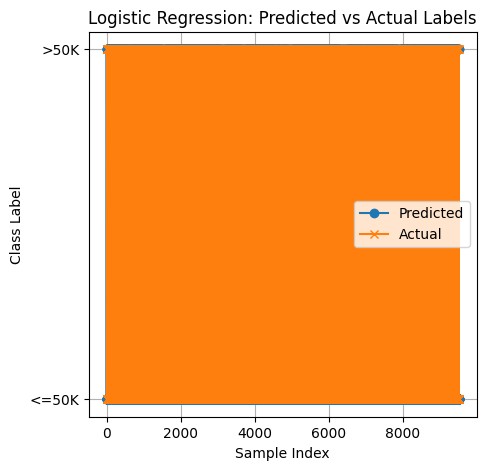

In [109]:
import matplotlib.pyplot as plt

# Optional: convert ytest to array if it's a pandas Series
import numpy as np
ytest_array = np.array(ytest)

# Plotting
plt.figure(figsize=(5, 5))
plt.plot(predict1, label='Predicted', marker='o')
plt.plot(ytest_array, label='Actual', marker='x')
plt.title('Logistic Regression: Predicted vs Actual Labels')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.legend()
plt.grid(True)
plt.show()


In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict1)

0.8203485930281395

In [111]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='adam',hidden_layer_sizes=(5,2),random_state=2,max_iter=2000)
clf.fit(xtrain,ytrain)
predict2=clf.predict(xtest)
predict2

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

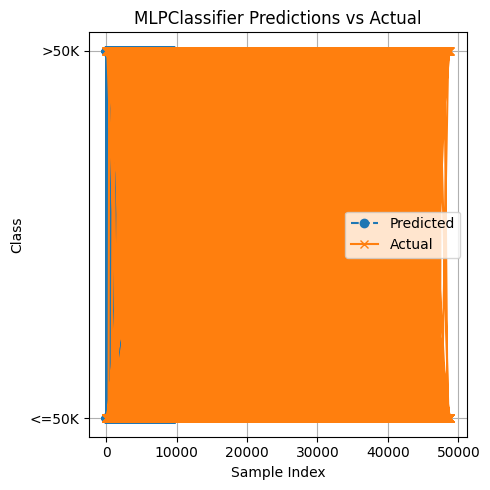

In [112]:
import matplotlib.pyplot as plt

# Assume ytest and predict2 are 1D arrays
plt.figure(figsize=(5, 5))
plt.plot(predict2, label='Predicted', marker='o', linestyle='--')
plt.plot(ytest, label='Actual', marker='x', linestyle='-')
plt.title('MLPClassifier Predictions vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict2)

0.8381982360352793

In [114]:
x = data[['age', 'occupation', 'hours-per-week']]  # ✅ x is a DataFrame
y = data['income']
x

,age,occupation,hours-per-week
0,25,6,40
1,38,4,50
2,28,10,40
3,44,6,40
4,18,14,30
...,...,...,...
48837,27,12,38
48838,40,6,40
48839,58,0,40
48840,22,0,20


In [115]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

assert isinstance(x, pd.DataFrame), "Make sure `x` is a pandas DataFrame"

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define feature types
categorical_features = ['occupation']
numeric_features = ['age', 'hours-per-week']

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Define models
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

# Train and evaluate
results = {}
for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Save the best pipeline (example: RandomForest)
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])
best_model.fit(x, y)
joblib.dump(best_model, "b_mo.pkl")
print("✅ Model saved as b_mo.pkl")


LogisticRegression Accuracy: 0.7846
              precision    recall  f1-score   support

       <=50K       0.82      0.93      0.87      7277
        >50K       0.58      0.32      0.41      2247

    accuracy                           0.78      9524
   macro avg       0.70      0.63      0.64      9524
weighted avg       0.76      0.78      0.76      9524

RandomForest Accuracy: 0.7793
              precision    recall  f1-score   support

       <=50K       0.83      0.89      0.86      7277
        >50K       0.54      0.42      0.48      2247

    accuracy                           0.78      9524
   macro avg       0.69      0.66      0.67      9524
weighted avg       0.76      0.78      0.77      9524

KNN Accuracy: 0.7678
              precision    recall  f1-score   support

       <=50K       0.83      0.87      0.85      7277
        >50K       0.51      0.43      0.47      2247

    accuracy                           0.77      9524
   macro avg       0.67      0.65      0.

In [116]:
import joblib

model = joblib.load("b_mo.pkl")
print(type(model))


<class 'sklearn.pipeline.Pipeline'>


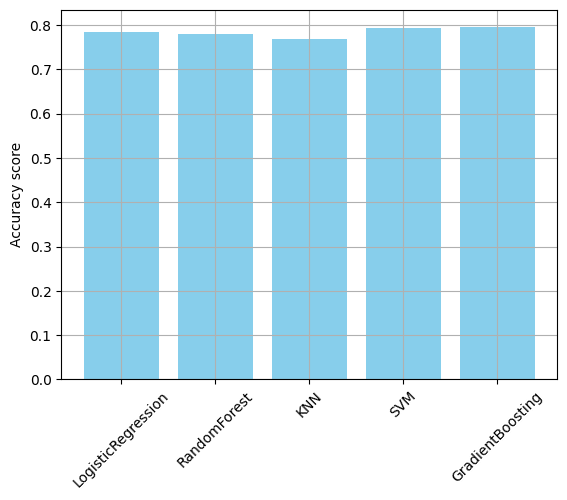

In [117]:
import matplotlib.pyplot as plt
plt.bar(results.keys(),results.values(),color='skyblue')
plt.ylabel('Accuracy score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 🔷 8. Model Evaluation and  Optimization

In [118]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load model
model = joblib.load("b_mo.pkl")

# Page configuration
st.set_page_config(
    page_title="💼 Employe Salary Prediction",
    page_icon="💰",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS styling
st.markdown("""
    <style>
        body {
            background-color: #f0f2f6;
        }
        .main {
            background-color: #ffffff;
            padding: 20px;
            border-radius: 10px;
        }
        h1, h2, h3 {
            color: #2c3e50;
        }
        .stButton>button {
            background-color: #28a745;
            color: white;
            font-weight: bold;
        }
        .stDownloadButton>button {
            background-color: #007bff;
            color: white;
            font-weight: bold;
        }
        .sidebar .sidebar-content {
            background-color: #d6eaff;
            padding: 15px;
            border-radius: 10px;
        }
    </style>
""", unsafe_allow_html=True)

# Title and subtitle
st.title("💼 Employe Salary Prediction")
st.markdown("Use this tool to **predict whether an employee earns more than $50K/year** based on job-related features.")

# Tabs
tab1, tab2 = st.tabs(["📊 Single Prediction", "📁 Batch Prediction"])

with tab1:
    st.header("🔍 Enter Employee Details")

    # Sidebar inputs
    st.sidebar.header("Input Features")
    age = st.sidebar.slider("Age", 18, 65, 30)
    occupation = st.sidebar.selectbox("Job Role", [
        "Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial",
        "Prof-specialty", "Handlers-cleaners", "Machine-op", "Adm-clerical",
        "Farming-fishing", "Transport-moving", "Priv-house-serv", "Protective-serv",
        "Armed-Forces"
    ])
    education = st.sidebar.selectbox("Education Level", [
        "Bachelors", "HS-grad", "11th", "Masters", "9th", "Some-college",
        "Assoc-acdm", "Assoc-voc", "Doctorate", "Prof-school"
    ])
    marital_status = st.sidebar.selectbox("Marital Status", [
        "Married-civ-spouse", "Divorced", "Never-married", "Separated",
        "Widowed", "Married-spouse-absent"
    ])
    sex = st.sidebar.radio("Sex", ["Male", "Female"])
    hours_per_week = st.sidebar.slider("Hours per Week", 1, 80, 40)

    # Create input DataFrame
    input_df = pd.DataFrame({
        'age': [age],
        'occupation': [occupation],
        'education': [education],
        'marital-status': [marital_status],
        'sex': [sex],
        'hours-per-week': [hours_per_week]
    })

    st.markdown("#### ✏️ Your Input")
    st.dataframe(input_df, use_container_width=True)

    # Predict button
    if st.button("🎯 Predict Salary Class"):
        try:
            prediction = model.predict(input_df)
            st.success(f"✅ Prediction: **{prediction[0]}**")
        except Exception as e:
            st.error(f"❌ Prediction error: {e}")

with tab2:
    st.header("📁 Batch Prediction from CSV")
    uploaded_file = st.file_uploader("📂 Upload CSV with employee data", type="csv")

    if uploaded_file is not None:
        try:
            batch_data = pd.read_csv(uploaded_file)
            st.markdown("#### 🧾 Uploaded Data Preview")
            st.dataframe(batch_data.head(), use_container_width=True)

            # Predict
            batch_preds = model.predict(batch_data)
            batch_data['Prediction'] = batch_preds

            st.markdown("#### ✅ Prediction Results")
            st.dataframe(batch_data, use_container_width=True)

            # Download results
            csv = batch_data.to_csv(index=False).encode('utf-8')
            st.download_button("⬇️ Download Results", csv, file_name="salary_predictions.csv", mime="text/csv")
        except Exception as e:
            st.error(f"❌ Prediction error: {e}")


Overwriting app.py


In [119]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 382.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [120]:
!ngrok authtoken 303JdApzYPl9jRYEzelfxLyyS73_aEsYxowaGgfjutw2rVnt

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [121]:
import os
import threading
def run_streamlit():
    os.system('streamlit run app.py --server.port 8051')
thread=threading.Thread(target=run_streamlit)
thread.start()


In [122]:
from pyngrok import ngrok
import time
time.sleep(5)
public_url=ngrok.connect(8051)
print("your streamlit app is livehere",public_url)

your streamlit app is livehere NgrokTunnel: "https://03998a4c4159.ngrok-free.app" -> "http://localhost:8051"
